# In Class Group Activity, Week 22, Heather Leighton-Dick

## 1. Use Splinter and/or Beautiful Soup to scrape mercadolibre.com.mx or soundcloud.com or tripadvisor.com. You must programmatically click a link from the front page to go to another page of interest to you and then select at least 5 items from that page. The 5 items must be stored in a data structure that makes sense (dictionary, list, etc).

In [17]:
import time
from selenium import webdriver
from bs4 import BeautifulSoup as bs
import requests
import pandas as pd
import re

In [18]:
from selenium import webdriver
from splinter import Browser
from webdriver_manager.chrome import ChromeDriverManager

#https://splinter.readthedocs.io/en/latest/finding.html

#executable_path = {'executable_path':ChromeDriverManager().install()}
#browser = Browser('chrome', **executable_path, headless=False)

#visit the url
url = 'https://soundcloud.com/'
browser.visit(url)

In [19]:
#tell the browser to click on "Explore" link
browser.links.find_by_partial_text('Explore').click()
time.sleep(1)

soup = bs(browser.html, 'html.parser')

all_divs = soup.find_all('div', class_='playableTile__artwork')

soundcloudlist = []

#extract information and create a dictionary to append to the list
for div in all_divs[:5]:
    try:
        chart=div.find('span')['aria-label']
        print(chart)
        
        link=div.find('a')['href']
        print(link)
        
        image=re.search('http.*jpg', div.find('span')['style']).group(0)
        print(image)                                                           

        chart_dict={'chart_name': chart, 'reference_url': link, 'image_link': image}
        
        soundcloudlist.append(chart_dict)
        
    except Exception as e:
            print(e)
    

Top 50: All music genres
/discover/sets/charts-top:all-music:us
https://i1.sndcdn.com/artworks-1Hod1KTMNrTcNumy-qzJjqw-t500x500.jpg
Top 50: Hip-hop & Rap
/discover/sets/charts-top:hiphoprap:us
https://i1.sndcdn.com/artworks-1Hod1KTMNrTcNumy-qzJjqw-t500x500.jpg
Top 50: Pop
/discover/sets/charts-top:pop:us
https://i1.sndcdn.com/artworks-JF6xhIxClSnO-0-t500x500.jpg
Top 50: R&B & Soul
/discover/sets/charts-top:rbsoul:us
https://i1.sndcdn.com/artworks-9ixbhhfjgJ9wWsGI-TlItkQ-t500x500.jpg
Top 50: Global Beats
/discover/sets/charts-top:world:us
https://i1.sndcdn.com/artworks-000350395503-2duk8l-t500x500.jpg


In [20]:
soundcloud_df = pd.DataFrame(soundcloudlist)

In [22]:
soundcloud_df

,chart_name,reference_url,image_link
0,Top 50: All music genres,/discover/sets/charts-top:all-music:us,https://i1.sndcdn.com/artworks-1Hod1KTMNrTcNum...
1,Top 50: Hip-hop & Rap,/discover/sets/charts-top:hiphoprap:us,https://i1.sndcdn.com/artworks-1Hod1KTMNrTcNum...
2,Top 50: Pop,/discover/sets/charts-top:pop:us,https://i1.sndcdn.com/artworks-JF6xhIxClSnO-0-...
3,Top 50: R&B & Soul,/discover/sets/charts-top:rbsoul:us,https://i1.sndcdn.com/artworks-9ixbhhfjgJ9wWsG...
4,Top 50: Global Beats,/discover/sets/charts-top:world:us,https://i1.sndcdn.com/artworks-000350395503-2d...


## 2. Share with your group how web scraping worked on the website and link you chose. Compare it with others. List the site you chose and two observations about parsing the website. Indicate if this was the same or different for the sites chosen by others.

Angela, Madison, Jamie, and I worked on web scraping Sound Cloud, a site with a lot of layers of information even though the overall look is clean and straightforward. The code contains several tags which seem "homemade" like "aria-label", "hero banner", and "tier indicator," so my guess is that Sound Cloud has an in-house html code system/library to keep their content and page structure consistent.

I toyed with trying to get at the first few tracks in the first list, "Top 50 All music genres", and it was a little more complicated than I could do quickly; in the screenshot, the code for the first track, "Kodak Black," is highlighted:

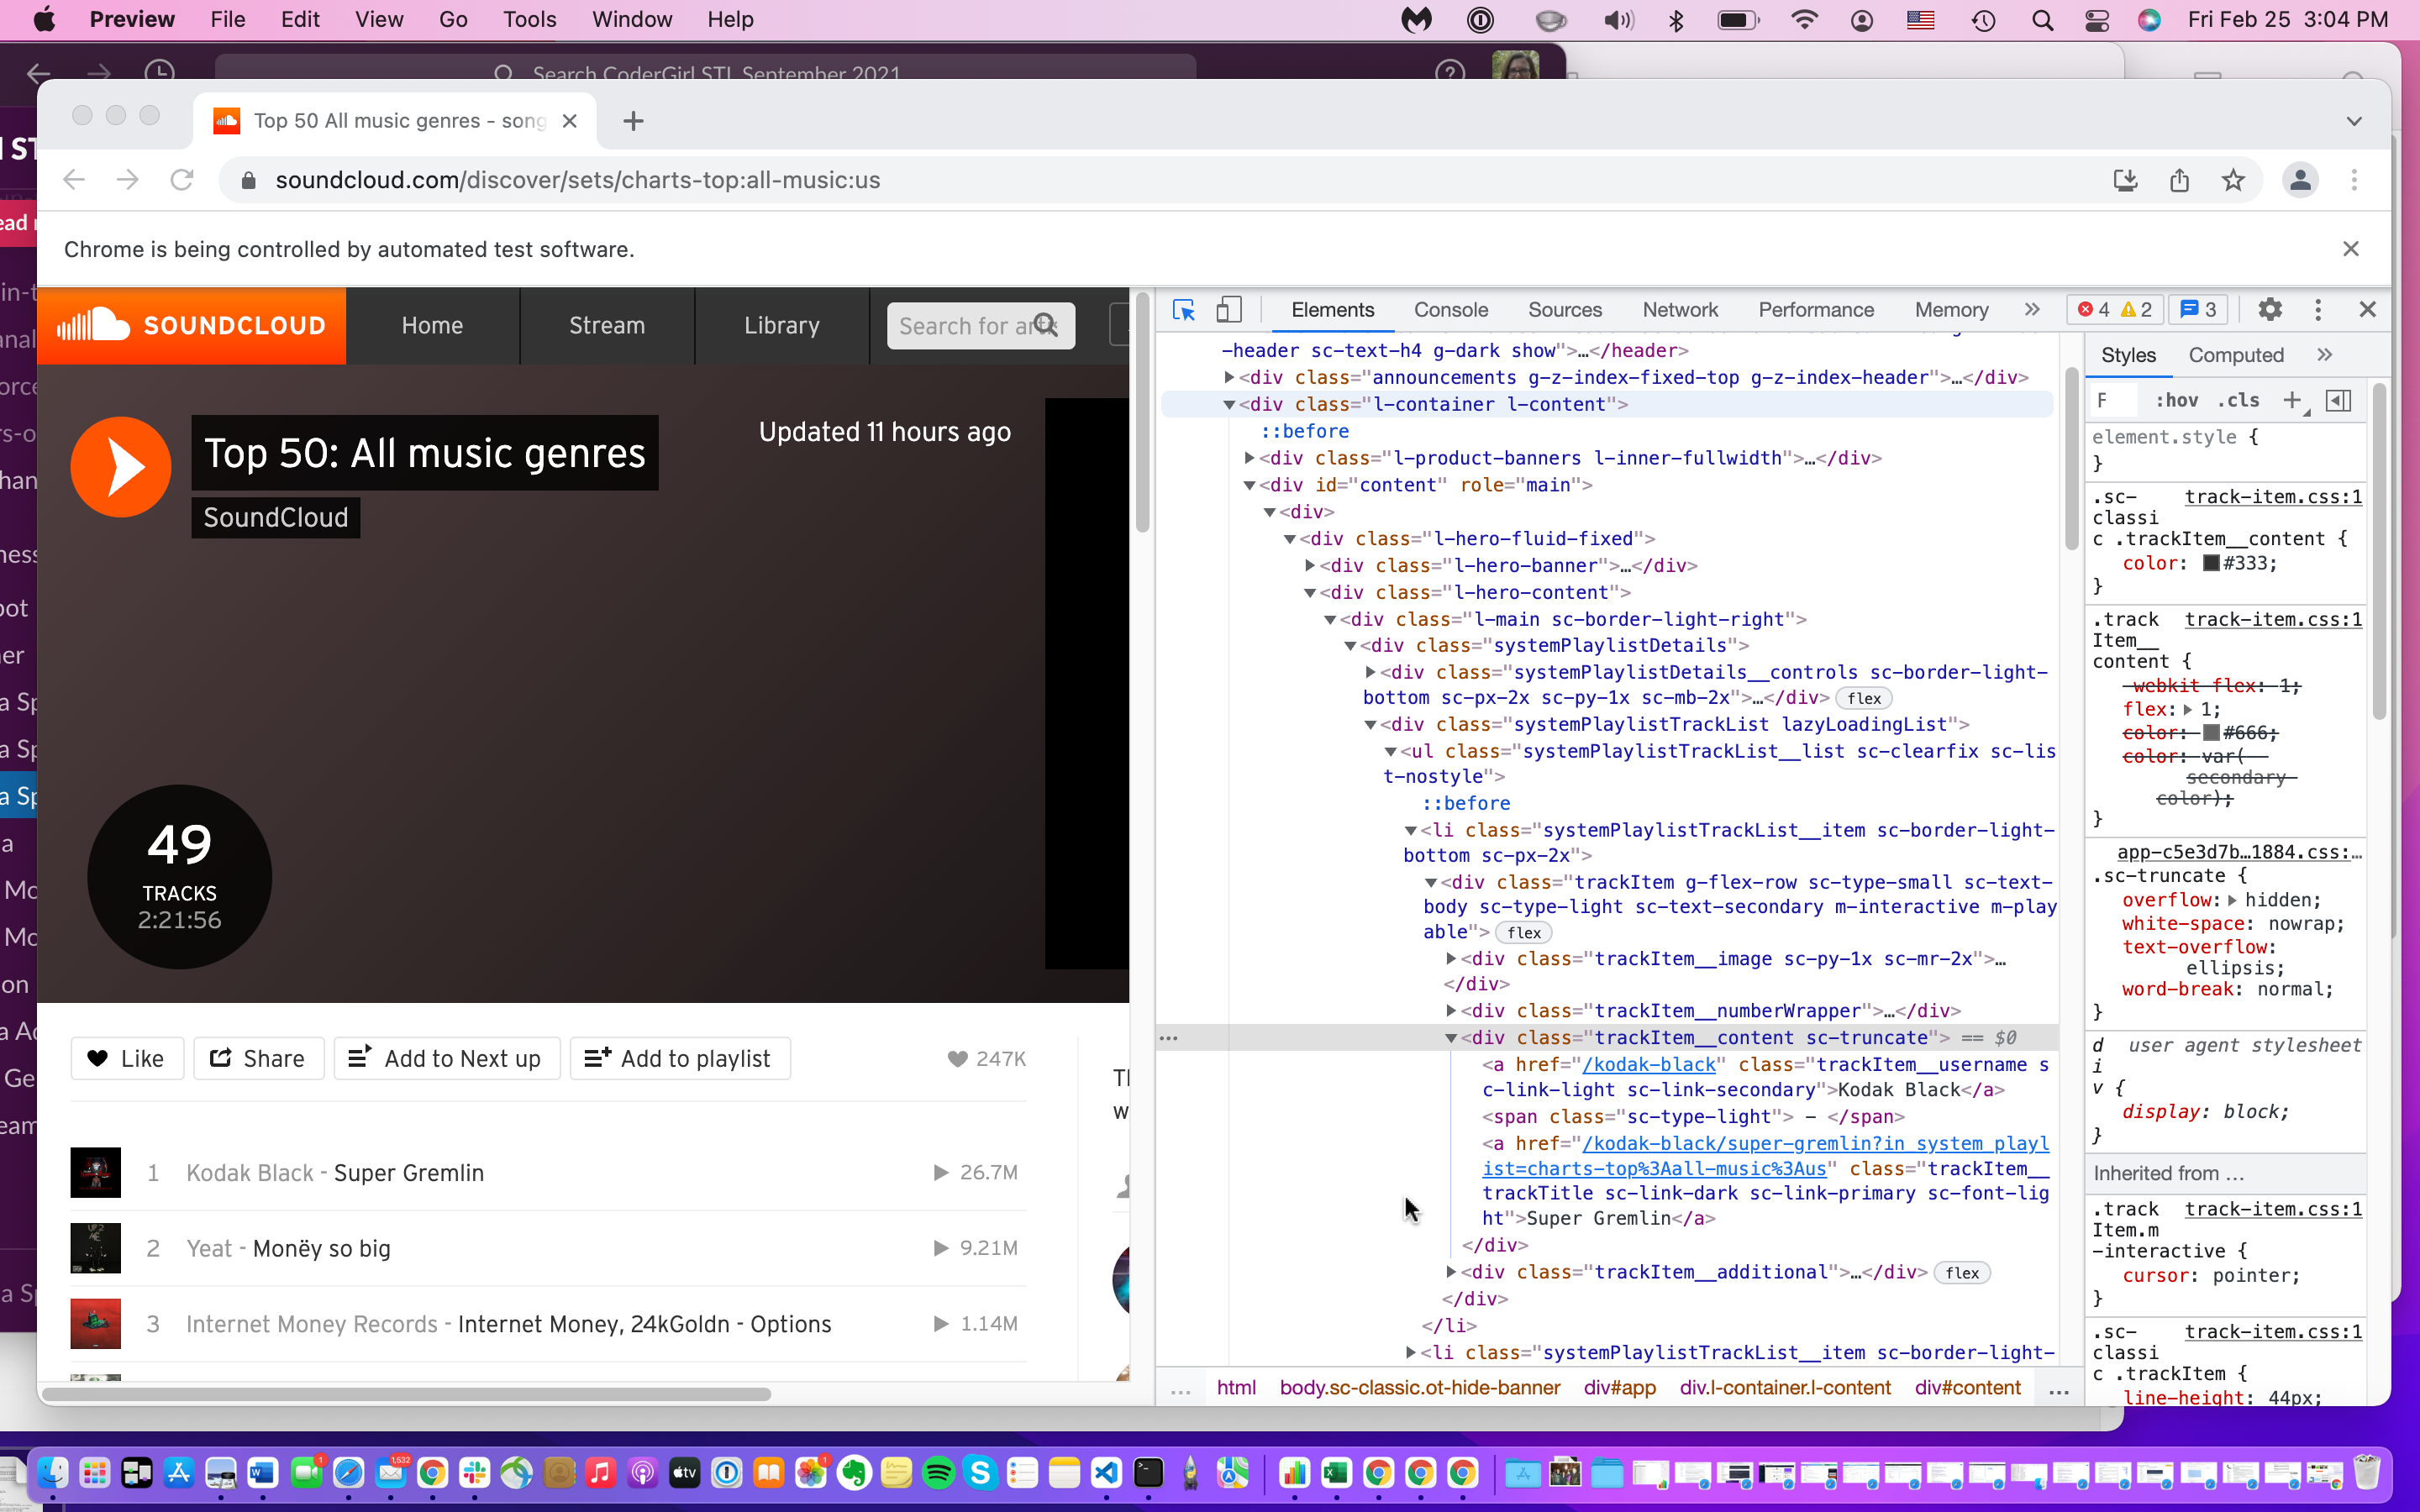